 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_file,index_col='Date',infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df.sort_index(ascending=True) # sort index in chronological order
whale_df.info()
whale_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_file = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_file,index_col='Date',infer_datetime_format=True, parse_dates=True)
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [8]:
algo_df.sort_index(ascending=True) # sort index in chronological order
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
algo_df.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [10]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp_file = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp_file,index_col='Date',infer_datetime_format=True, parse_dates=True)
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [13]:
sp500_df.sort_index(ascending=True) # sort index in chronological order
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [14]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","").astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [84]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [85]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [86]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500"]
daily_returns.columns = columns
daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [87]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_df,algo_df,daily_returns],axis=1,join='inner')
portfolio_returns.sort_index(ascending=True) # sort index in chronological order

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [20]:
portfolio_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,0.000171,-0.000217,-0.000089,0.000494,0.000658,0.000254,-0.000281
std,0.007896,0.007026,0.010897,0.012919,0.007623,0.008341,0.008587
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.047250
25%,-0.003641,-0.004044,-0.004792,-0.005655,-0.003257,-0.003799,-0.004456
50%,0.000517,0.000000,0.000313,0.000726,0.000069,0.000698,-0.000450
75%,0.004320,0.003629,0.005233,0.007565,0.003874,0.005226,0.002881
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.042730


In [21]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2015-03-03 to 2019-04-22
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1042 non-null   float64
 1   PAULSON & CO.INC.            1042 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1042 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1042 non-null   float64
 4   Algo 1                       1042 non-null   float64
 5   Algo 2                       1042 non-null   float64
 6   S&P 500                      1042 non-null   float64
dtypes: float64(7)
memory usage: 65.1 KB


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

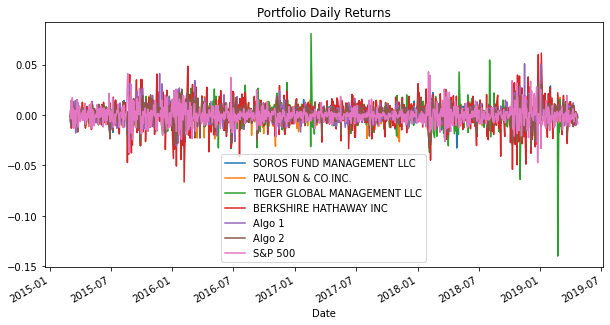

In [56]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(10,5),title='Portfolio Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

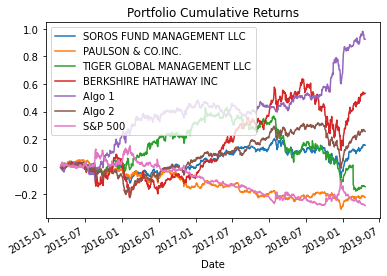

In [57]:
# Calculate cumulative returns of all portfolios
cumulativeReturns = (1 + portfolio_returns).cumprod() - 1

# Plot cumulative returns
cumulativeReturns.plot(title='Portfolio Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

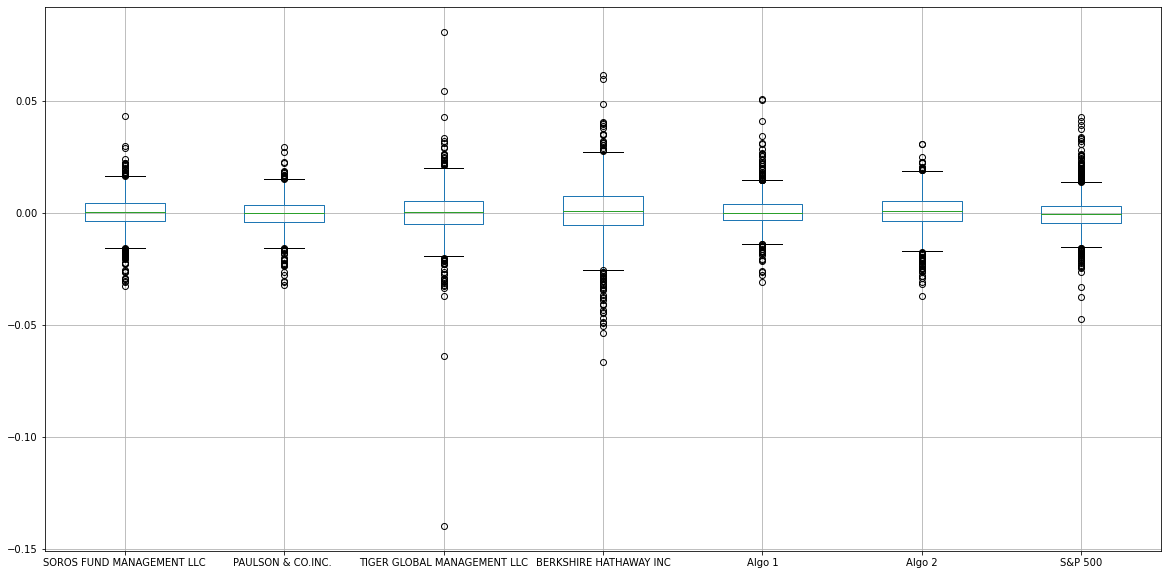

In [61]:
# Box plot to visually show risk
portfolio_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [62]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [63]:
# Calculate  the daily standard deviation of S&P 500
SP500_std = portfolio_returns['S&P 500'].std()
print("S&P 500 STD:")
print(SP500_std)
print("")

# Determine which portfolios are riskier than the S&P 500
print("Is portfolio riskier than S&P 500?")
print(SP500_std < daily_std)

S&P 500 STD:
0.00858688974707399

Is portfolio riskier than S&P 500?
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
ann_var = (daily_std.var()*252)
ann_std = np.sqrt(ann_var)
ann_std

0.03340134893400717

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Portfolio 21-Day Rolling Standard Deviation'}, xlabel='Date'>

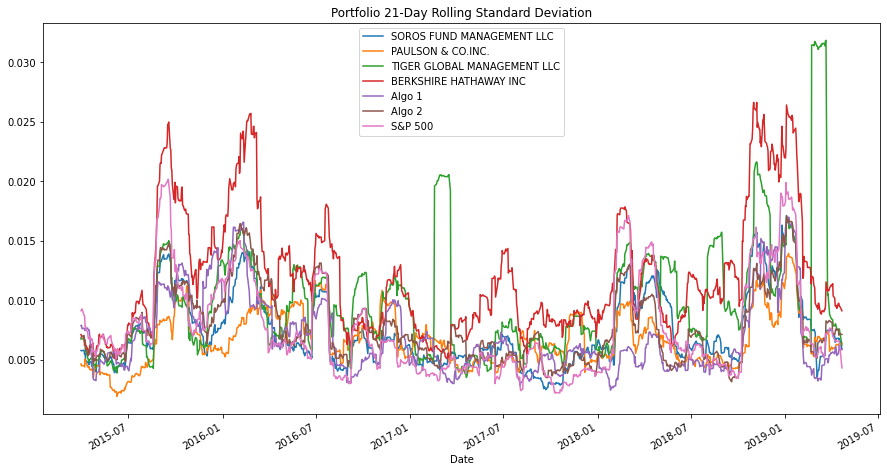

In [64]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_21 = portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
std_21.plot(figsize=(15,8),title='Portfolio 21-Day Rolling Standard Deviation')

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
corr = portfolio_returns.corr()
# Display the correlation matrix
corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

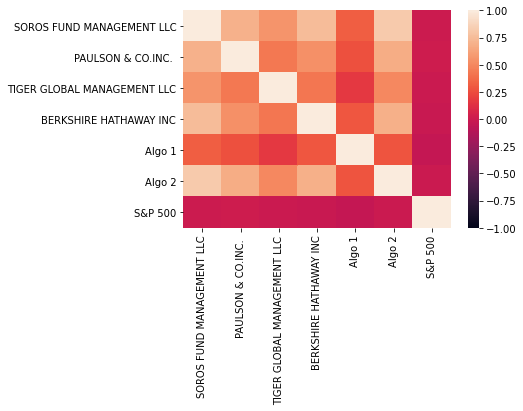

In [88]:
sns.heatmap(corr, vmin=-1, vmax=1) # portfolio correlation heatmap

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC and S&P 500 Returns Rolling 21-Day Covariance'}, xlabel='Date'>

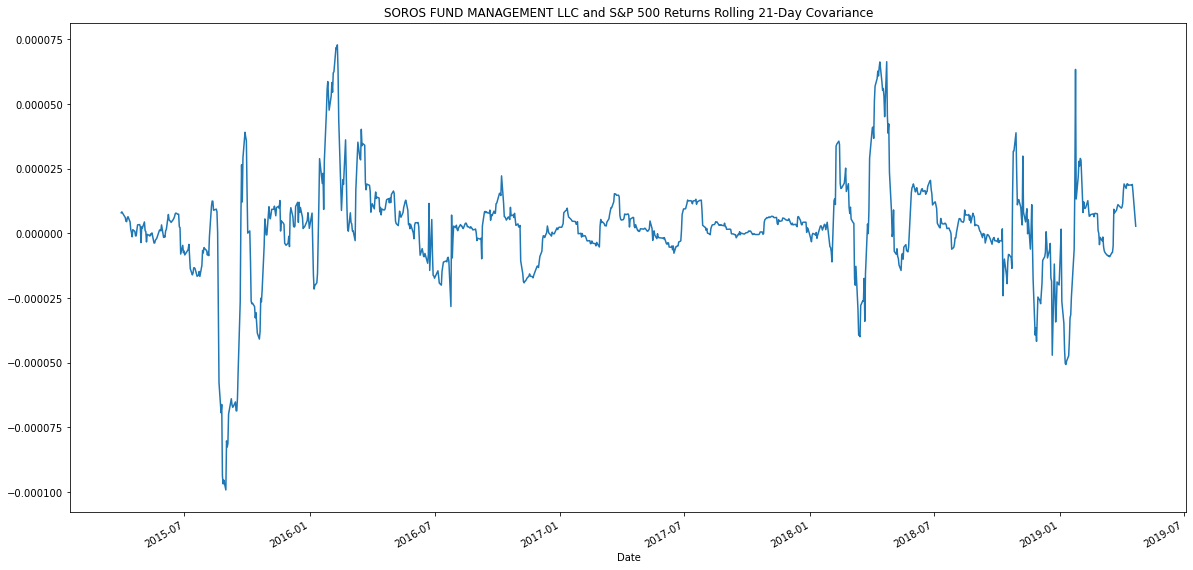

In [67]:
# Calculate covariance of a single portfolio
covariance = portfolio_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(portfolio_returns['S&P 500'])
covariance.plot(figsize=(20, 10), title='SOROS FUND MANAGEMENT LLC and S&P 500 Returns Rolling 21-Day Covariance') 

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Returns and S&P 500 Returns Rolling 21-Day Variance'}, xlabel='Date'>

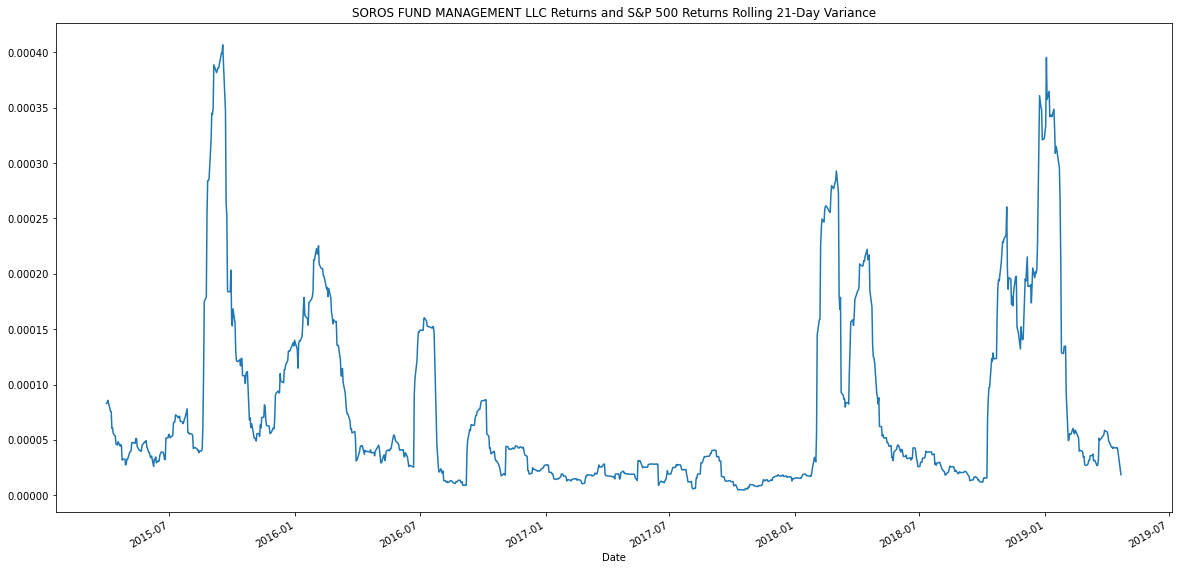

In [68]:
# Calculate variance of S&P 500
var_SP500 = portfolio_returns['S&P 500'].rolling(window=21).var()
var_SP500.plot(figsize=(20,10),title='SOROS FUND MANAGEMENT LLC Returns and S&P 500 Returns Rolling 21-Day Variance')

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC and S&P 500 Rolling 21-Day Beta'}, xlabel='Date'>

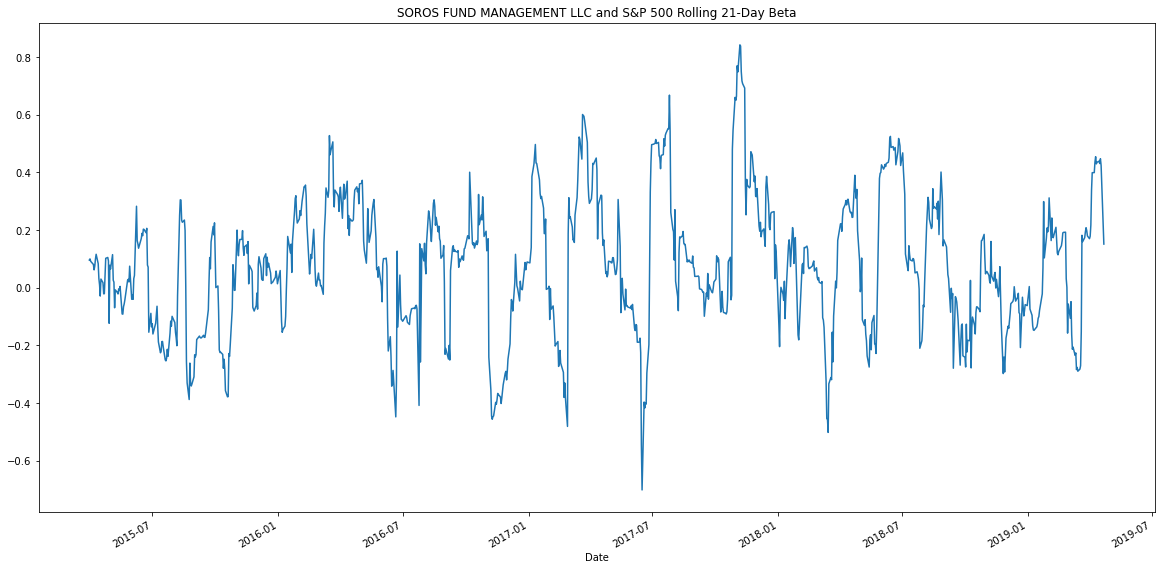

In [69]:
# Computing beta
rolling_beta = covariance / var_SP500

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='SOROS FUND MANAGEMENT LLC and S&P 500 Rolling 21-Day Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Portfolio Exponentially Weighted 21-Day Moving Average'}, xlabel='Date'>

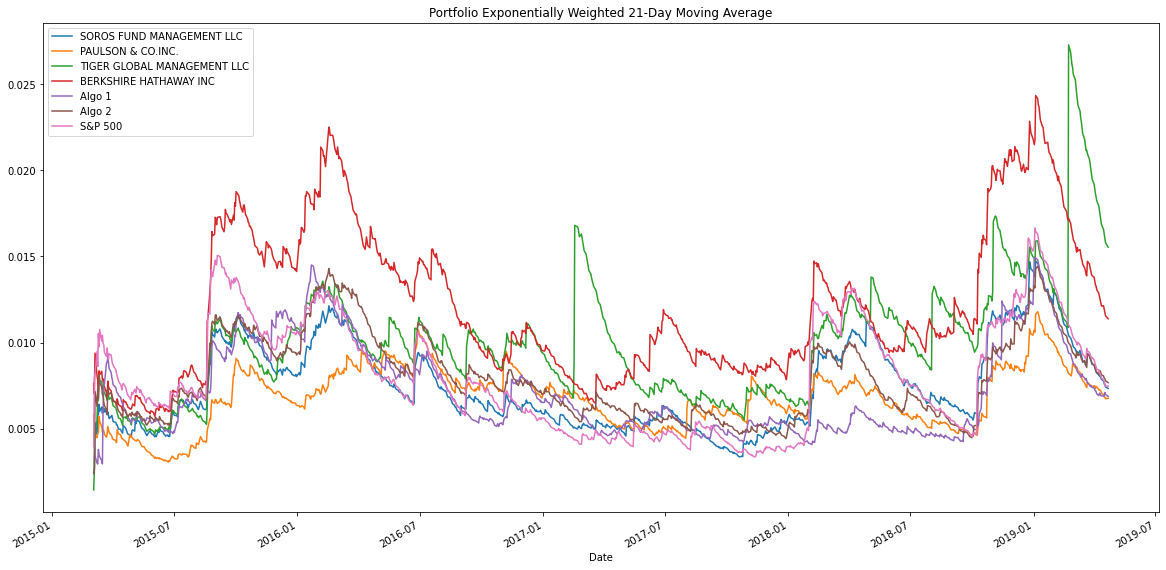

In [70]:
# Use `ewm` to calculate the rolling window
portfolio_returns.ewm(halflife=21).std().plot(figsize=(20,10),title="Portfolio Exponentially Weighted 21-Day Moving Average")

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
SR = (portfolio_returns.mean() *252) / (portfolio_returns.std() * np.sqrt(252))
SR

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

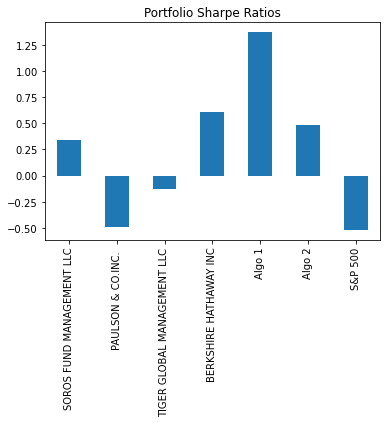

In [71]:
# Visualize the sharpe ratios as a bar plot
SR.plot.bar(title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes, both Algorithmic strategies portfolio outperforms the market and nearly all the whales portfolios (with the exception of BERKSHIRE HATHAWAY INC outperforming by a slight margin over Algo 2).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [36]:
# Reading data from 1st stock
goog_file = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_file,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
goog_df.sort_index(ascending=True,inplace=True) # sort index in chronological order
goog_df.dropna() # drop null values

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [89]:
# Reading data from 2nd stock
aapl_file = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_file,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
aapl_df.sort_index(ascending=True) # sort index in chronological order
aapl_df.dropna() # drop null values

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [90]:
# Reading data from 3rd stock
cost_file = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_file,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
cost_df.sort_index(ascending=True) # sort index in chronological order
cost_df.dropna() # drop null values

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [39]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df,aapl_df,cost_df],axis='columns',join='inner')
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [91]:
# Reset Date index
combined_df.sort_index(ascending=True,inplace=True) # sort index in chronological order
combined_df

,Symbol,GOOG,Symbol,AAPL,Symbol,COST
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [92]:
# Reorganize portfolio data by having a column per symbol
# RENAME NOCP with SYMBOL 
# DROP SYMBOL COLUMNS
columns=["Symbol","GOOG","Symbol","AAPL","Symbol","COST"]
combined_df.columns=columns
combined_df

,Symbol,GOOG,Symbol,AAPL,Symbol,COST
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [93]:
combined_clean = combined_df.drop(columns=['Symbol'])
combined_clean

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [94]:
# Calculate daily returns
daily_returns = combined_clean.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [96]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
daily_returns_weighted = daily_returns.dot(weights)

# Display sample data
daily_returns_weighted.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [97]:
# Join your returns DataFrame to the original returns DataFrame
folio_returns = pd.concat([daily_returns_weighted, portfolio_returns],axis=1,join='inner')
folio_returns.sort_index(ascending=True,inplace=True) # sort index in chronological order
folio_returns.rename(columns={0:"Custom"},inplace=True) # rename column for Custom portfolio
folio_returns.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [98]:
folio_returns.describe()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,0.000736,0.000221,0.000106,-0.000986,0.000101,0.001064,0.000004,-0.000259
std,0.013331,0.009248,0.007366,0.014671,0.015579,0.008437,0.008788,0.009605
min,-0.049762,-0.029343,-0.032099,-0.139820,-0.053816,-0.026095,-0.031953,-0.047250
25%,-0.004815,-0.004007,-0.004319,-0.006604,-0.006789,-0.003196,-0.003684,-0.004914
50%,0.001945,0.000723,-0.000019,0.000000,0.000950,0.000210,0.000413,-0.000705
75%,0.006801,0.004617,0.004469,0.006127,0.007521,0.003649,0.004890,0.003184
max,0.060226,0.042977,0.029338,0.054425,0.061341,0.050735,0.030822,0.033981


In [99]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
folio_returns.dropna(inplace=True)
folio_returns.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
folio_var = (folio_returns.var()*252)
folio_ann_sd = np.sqrt(folio_var)
folio_ann_sd

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Custom Portfolio Rolling Standard Deviation (21 Days)'}>

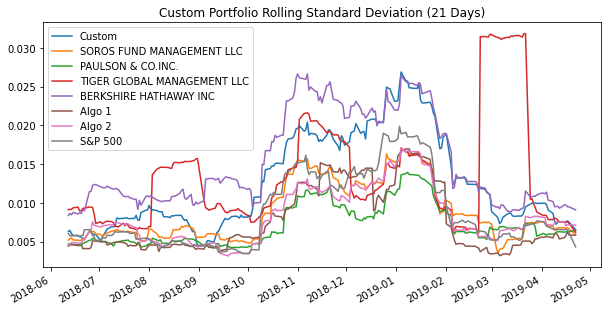

In [72]:
# Calculate rolling standard deviation
folio_sd_21days = folio_returns.rolling(window=21).std()
# Plot rolling standard deviation
folio_sd_21days.plot(figsize=(10,5),title='Custom Portfolio Rolling Standard Deviation (21 Days)')

### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
folio_corr = folio_returns.corr()
folio_corr

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Custom,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
S&P 500,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


<AxesSubplot:>

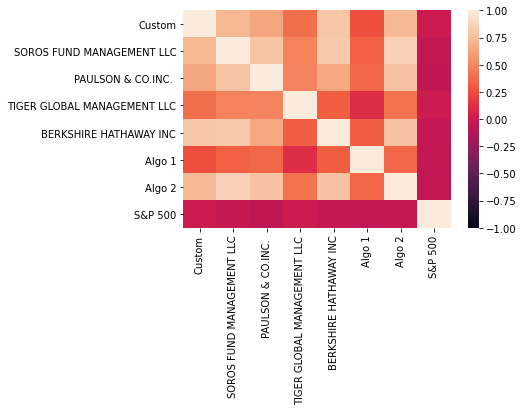

In [81]:
sns.heatmap(folio_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio and S&P 500 Returns Rolling 60-Day Covariance'}>

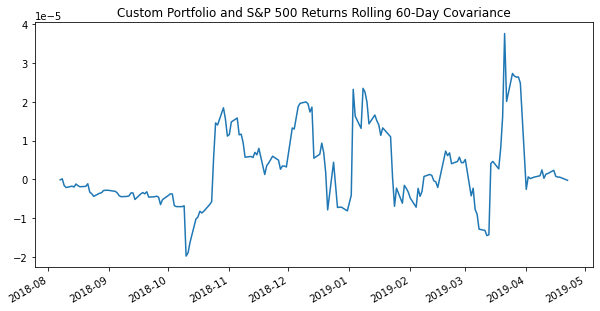

In [82]:
# Calculate and plot Beta
cov = folio_returns['Custom'].rolling(window=60).cov(folio_returns['S&P 500'])
cov.plot(figsize=(10,5), title='Custom Portfolio and S&P 500 Returns Rolling 60-Day Covariance')

<AxesSubplot:title={'center':'Custom Portfolio and S&P 500 Returns Rolling 60-Day Beta'}>

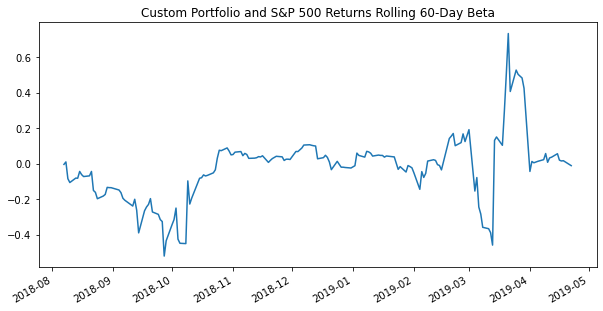

In [83]:
beta = cov / var_SP500
beta.plot(figsize=(10,5), title='Custom Portfolio and S&P 500 Returns Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualized Sharpe Ratios
annual_SR = (folio_returns.mean()* 252) / (folio_returns.std()) * np.sqrt(252)
annual_SR

Custom                         220.790336
SOROS FUND MANAGEMENT LLC       95.761666
PAULSON & CO.INC.               57.349406
TIGER GLOBAL MANAGEMENT LLC   -268.791988
BERKSHIRE HATHAWAY INC          25.957467
Algo 1                         504.317403
Algo 2                           1.848069
S&P 500                       -107.774418
dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Sharpe Ratios'}>

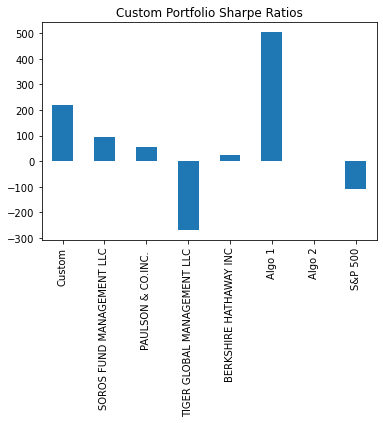

In [75]:
# Visualize the sharpe ratios as a bar plot
annual_SR.plot.bar(title="Custom Portfolio Sharpe Ratios")

### How does your portfolio do?

The custom portfolio performs well, second only behind Algo 1.